In [ ]:
# @title
import math
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# @title
gamma = np.array([5/3, 7/5])
cv = np.array([3/2, 5/2])
cp = np.array([5/2, 7/2])
n = np.array([1, 2])

T = np.array([np.linspace(300, 500, 100), np.linspace(300, 500, 100)])
V = np.array([np.linspace(10, 100, 100), np.linspace(10, 50, 100)])

#**Proceso Adiabático**

En este proceso se satisfacen las siguientes expresiones.

$$PV^{\gamma} = \text{cte}$$
$$TV^{\gamma-1} = \text{cte}$$
$$TP^{\frac{\gamma-1}{\gamma}}=\text{cte}$$

Los procesos adiabáticos no producen cambios en las coordenadas termodinámicas debido a flujos de calor.

$$\delta Q=0$$

Por lo anterior, el cambio en entropía de estos sistemas es

$$\Delta S=0$$

In [ ]:
# @title
def adiabatic(T):
  V = (n[:, np.newaxis]/T)**(1/(gamma - 1))[:, np.newaxis]
  P = n[:, np.newaxis]/(V**gamma[:, np.newaxis])
  S =  np.ones((2, len(T[0])))
  return P, V, T, S

In [ ]:
# @title
ad_PVTS = adiabatic(T)



---



#**Proceso Isotérmico**

En estos procesos a temperatura constante se satisface que

$$PV=cte$$

Los cambios en la energía interna del sistema

$$\Delta U=0$$

$$\delta Q=-\delta W$$

De lo anterior, el cambio en la entropía

$$\Delta S = \int\frac{\delta Q}{T}=nR\ln{\frac{V_2}{V_1}}$$

In [ ]:
# @title
def isotermic(V):
  P = n[:, np.newaxis]/V
  T = np.ones((2, len(V[0])))
  S = n[:, np.newaxis]*np.log(V/V[0, 0])
  return P, V, T, S

In [ ]:
# @title
isot_PVTS = isotermic(V)



---



#**Proceso Isocorico**

En estos procesos de Volumen constante se satisface

$$\frac{T}{P}=cte$$

Al mantenerse el volumen constante no hay trabajo de expansión $\delta W=0$

$$dU=\delta Q_v=nC_vdT$$

El cambio en la entropía es entonces

$$\Delta S = \int\frac{\delta Q_v}{T}=nC_v\ln{\frac{T_2}{T_1}}$$

In [ ]:
# @title
def isocoric(T):
  P = n[:, np.newaxis]*T
  V = np.ones((2, len(T[0])))
  S = (cv*n)[:, np.newaxis]*np.log(T/T[0,0])
  return P, V, T, S

In [ ]:
# @title
isoc_PVTS = isocoric(T)



---



#**Proceso Isobárico**

Los procesos a Presión constante satisfacen

$$\frac{T}{V}=cte$$

El flujo de calor es

$$\delta Q_p = nC_pdT$$

El cambio en la entropía resulta

$$\Delta S = \int\frac{\delta Q_p}{T}=nC_p\ln{\frac{T_2}{T_1}}$$

In [ ]:
# @title
def isobaric(T):
  V = n[:, np.newaxis]*T
  P = np.ones((2, len(T[0])))
  S = (cp*n)[:, np.newaxis]*np.log(T/T[0, 0])
  return P, V, T, S

In [ ]:
# @title
isob_PVTS = isobaric(T)



---



#**Procesos Isentrópicos**

Se dan a entropía constante por lo que no hay flujos de calor en el sistema

$$\Delta S=0$$

$$\delta Q=0$$

Por lo anterior se satisfacen las expresiones para procesos adiabáticos.



---



In [ ]:
# @title
Ps = np.array([ad_PVTS[0], isot_PVTS[0],
               isoc_PVTS[0], isob_PVTS[0]])
Vs = np.array([ad_PVTS[1], isot_PVTS[1],
               isoc_PVTS[1], isob_PVTS[1]])
Ts = np.array([ad_PVTS[2], isot_PVTS[2],
               isoc_PVTS[2], isob_PVTS[2]])
Ss = np.array([ad_PVTS[3], isot_PVTS[3],
               isoc_PVTS[3], isob_PVTS[3]])

In [ ]:
# @title
titles = ['Adiabatico e Isentropico', 'Isotermico', 'Isocorico', 'Isobarico']

#**Diagrama ST**

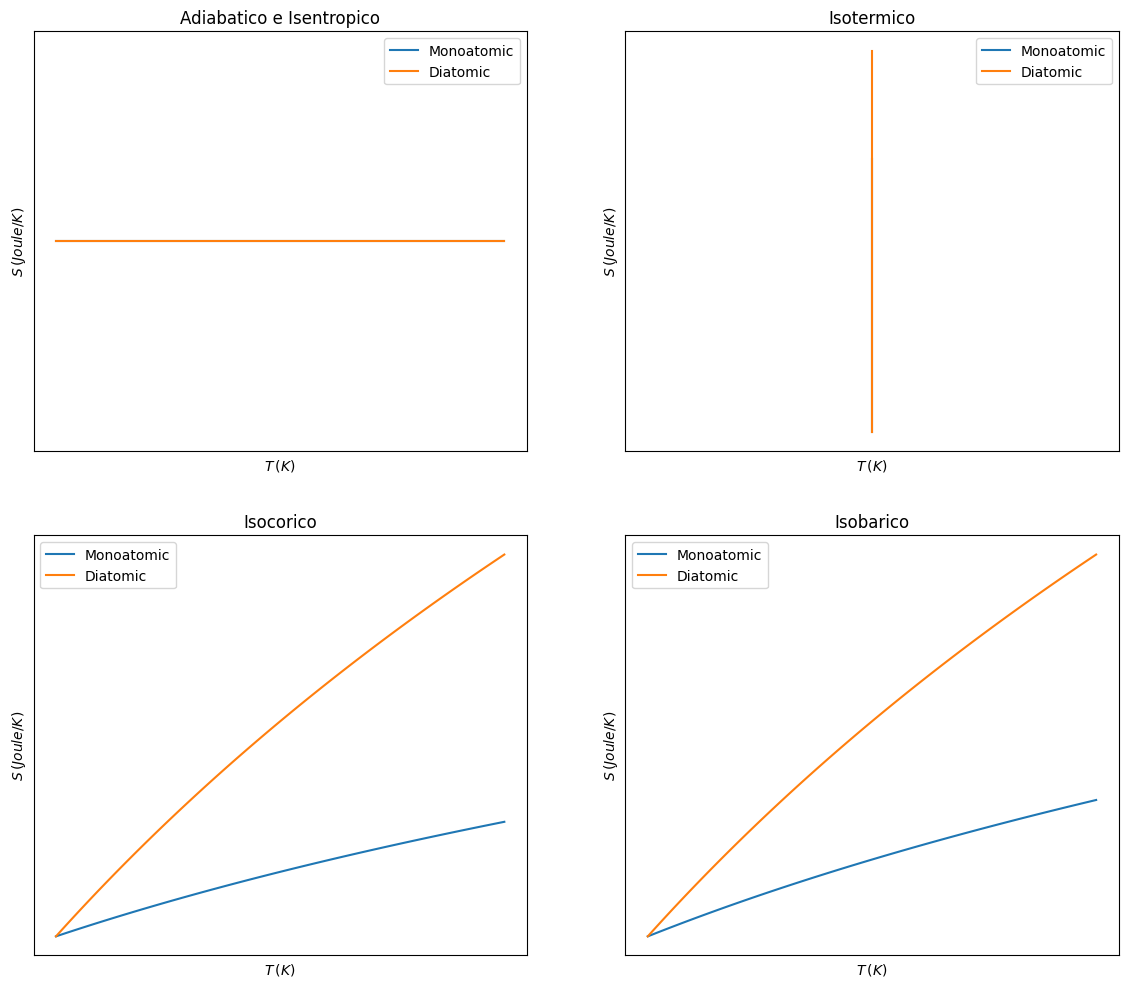

In [ ]:
# @title
plt.figure(figsize=(14,12))

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.plot(Ts[i, 0], Ss[i, 0], label = 'Monoatomic')
  plt.plot(Ts[i, 1], Ss[i, 1], label = 'Diatomic')
  plt.legend()
  plt.xlabel('$T\,(K)$')
  plt.ylabel('$S\, (Joule/K)$')
  plt.title(titles[i])
  plt.yticks([])
  plt.xticks([])

plt.show()



---



#**Diagrama PV**

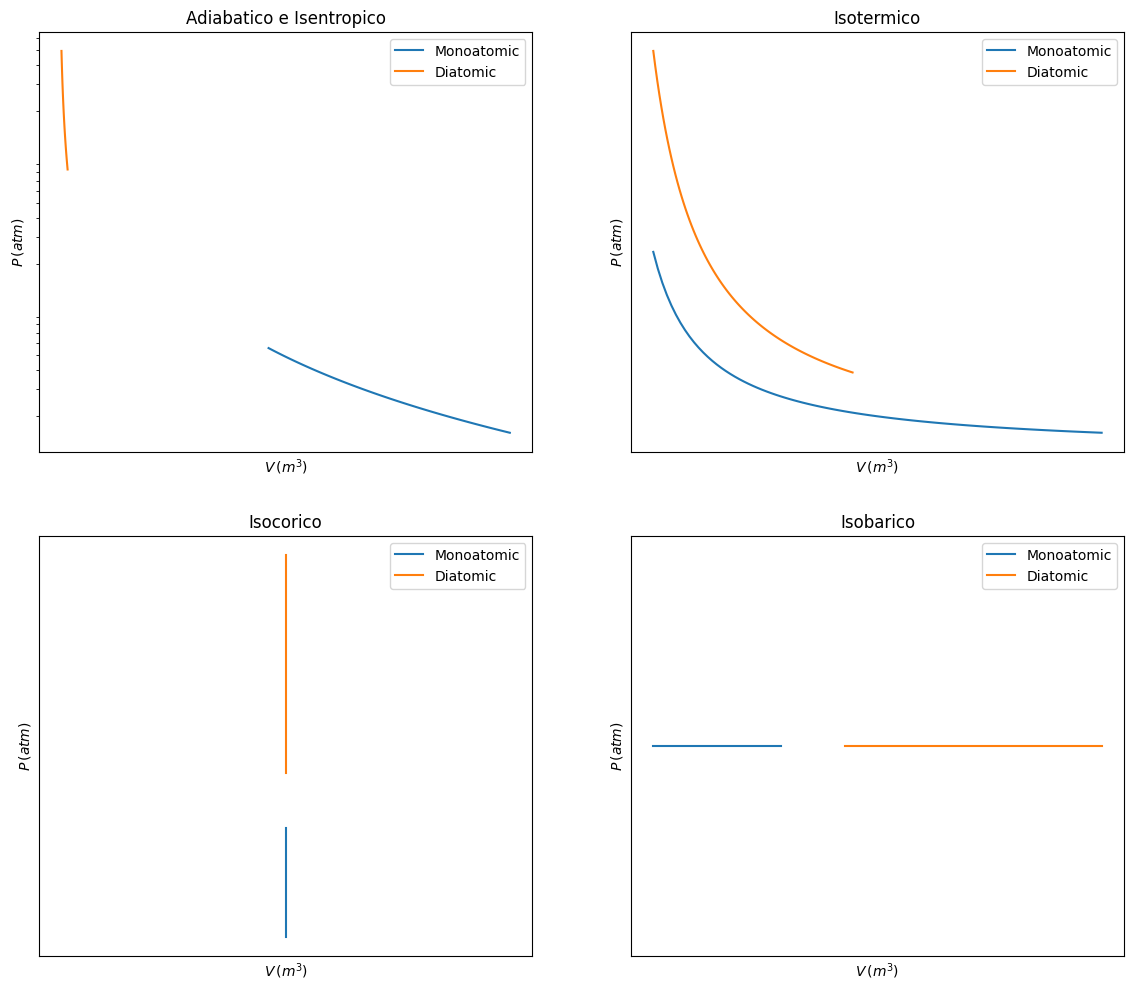

In [ ]:
# @title
plt.figure(figsize=(14,12))

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.plot(Vs[i, 0], Ps[i, 0], label = 'Monoatomic')
  plt.plot(Vs[i, 1], Ps[i, 1], label = 'Diatomic')
  plt.legend()
  plt.xlabel('$V\,(m^3)$')
  plt.ylabel('$P\, (atm)$')
  plt.title(titles[i])
  plt.yticks([])
  plt.xticks([])
  if i == 0:
    plt.yscale('log')
    plt.xticks([])
    plt.yticks([])

plt.show()



---



#**Diagrama PT**

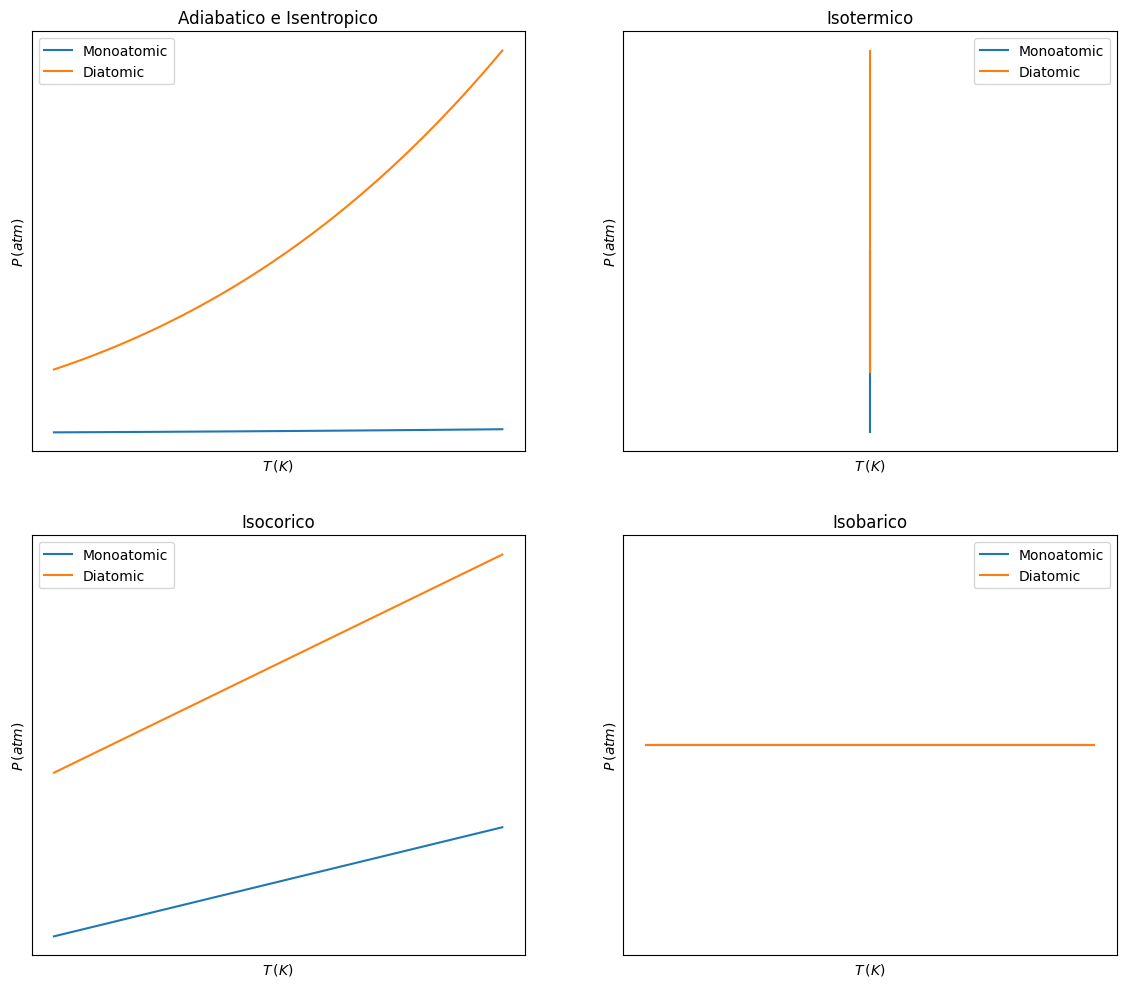

In [ ]:
# @title
plt.figure(figsize=(14,12))

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.plot(Ts[i, 0], Ps[i, 0], label = 'Monoatomic')
  plt.plot(Ts[i, 1], Ps[i, 1], label = 'Diatomic')
  plt.xlabel('$T\,(K)$')
  plt.ylabel('$P\, (atm)$')
  plt.title(titles[i])
  plt.legend()
  plt.yticks([])
  plt.xticks([])

plt.show()



---



#**Diagrama VT**

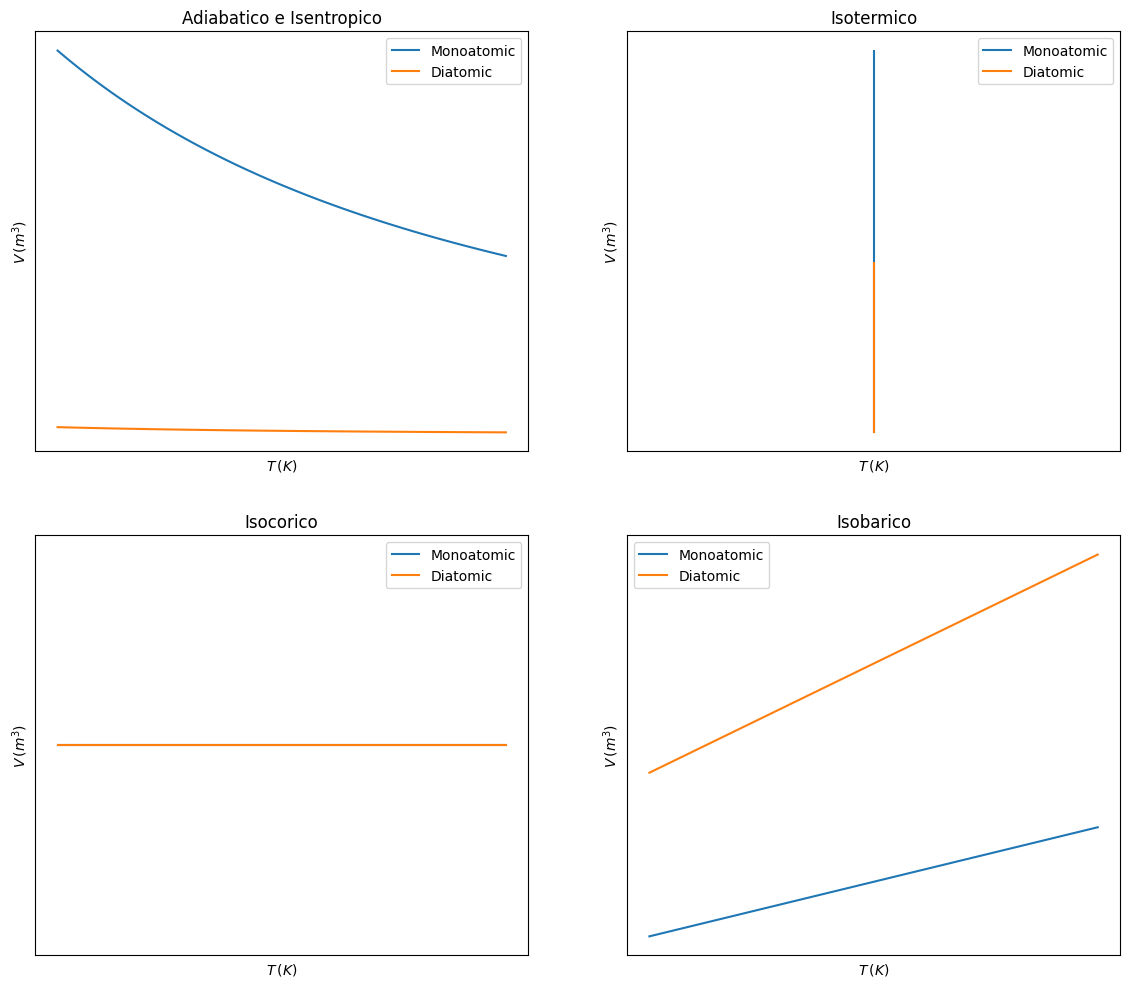

In [ ]:
# @title
plt.figure(figsize=(14,12))

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.plot(Ts[i, 0], Vs[i, 0], label = 'Monoatomic')
  plt.plot(Ts[i, 1], Vs[i, 1], label = 'Diatomic')
  plt.xlabel('$T\,(K)$')
  plt.ylabel('$V\, (m^3)$')
  plt.title(titles[i])
  plt.legend()
  plt.yticks([])
  plt.xticks([])

plt.show()



---



#**Superficie PVT - Gráfico Manipulable**

In [ ]:
# @title
T_mesh, V_mesh = np.meshgrid(T, V)
P_mesh = T_mesh/V_mesh

In [ ]:
# @title
fig = go.Figure(data=[go.Surface(z=P_mesh, x=T_mesh, y=V_mesh)])

fig.update_layout(
    title = 'Superficie PVT',
    scene = dict(
        xaxis_title = 'T (K)',
        yaxis_title = 'V (m3)',
        zaxis_title = 'P (atm)'),
        width=800,
        height=600)

fig.show()

Output hidden; open in https://colab.research.google.com to view.



---

Todas las gráficas se construyeron sobre rangos de temperatura desde $300 -500\,K$ y rangos de volumen de $10-100\, m^3$

#**Discusión**

**Diagrama PV (Presión-Volumen):**
1. **Proceso Adiabático e Isentrópicos:** En un proceso adiabático, la presión disminuye rápidamente con la expansión y aumenta con la compresión. Los gases monoatomicos, como el helio, experimentan cambios más drásticos en la temperatura debido a su mayor capacidad de calor específico.

2. **Proceso Isotérmico:** En un proceso isotérmico, la curva es una hipérbola. Los cambios de presión son más pronunciados sobre gases diatómicos, mientras que los cambios de volumen son mayores en gases monoatómicos

**Diagrama PT (Presión-Temperatura):**
1. **Proceso Adiabático e Isentrópico:** Los procesos adiabáticos en gases diatómicos muestran una fuerte relación inversa entre la presión y la temperatura. La temperatura disminuye rápidamente con la expansión y aumenta con la compresión.

2. **Proceso Isocórico:** Los procesos isocóricos en gases monoatómicos siguen una relación lineal entre presión y temperatura, con una pendiente determinada por su capacidad de calor específico a volumen constante, sin embargo menor a la pendiente en gases diatómicos.

**Diagrama VT (Volumen-Temperatura):**
1. **Proceso Adiabático:** En un proceso adiabático, la relación entre volumen y temperatura es más pronunciada sobre los gases monoatómicos, lo que indica cambios significativos en la temperatura debido a la expansión o compresión rápida. Sobre los gases diatómicos el cambio es casi despreciable

2. **Proceso Isobárico:** En procesos isobáricos, la temperatura aumenta con el volumen de manera pronunciada en gases diatómicos debido a la menor capacidad de calor específico de los gases monoatómicos.

**Diagrama TS (Temperatura-Entropía):**

1. **Proceso Isotérmico:**
En este tipo de proceso, la entropía tiende a aumentar a medida que la temperatura se mantiene constante. El aumento en el volumen de los gases incrementa el grado de desorden en el sistema.

2. **Proceso Adiabatico e Isentrópico:** En procesos isotérmicos, la curva es una línea horizontal, lo que indica que la entropía se mantiene constante mientras cambia la temperatura.

3. **Proceso Isocórico e Isobárico:** En procesos isocóricos, la entropía aumenta con la temperatura de manera lineal, con la pendiente determinada por la capacidad de calor específico a volumen constante.

**Superficie PVT (Presión-Volumen-Temperatura):**
- La superficie PVT para gases monoatómicos muestra un comportamiento único en función de las tres variables. Las diferentes trayectorias en la superficie representan procesos adiabáticos, isotérmicos, isocóricos, isobáricos e isoentrópicos con sus características únicas.

- Se aprecian dos curvas principales que representan las relaciones directa e inversamente proporcional entre las variables termodinámicas.

